In [12]:
library("purrr")
library("tidyverse")

theme_set(theme_gray(base_size = 16))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Workflow for hypthesis testing:

1. Calculate test statistic from actual data
1. Simulate data under the null model
1. Calculcate test statistic values from simulated data
1. Count how often simulated test statistic values exceed actual test statistic

## Calculate test statistic

In [13]:
# Difference between 140 (observed) and 125 (expected for a fair coin)

observed <- 140 # number of heads
expected <- 125 # fair coin

test_statistic <- abs(observed - expected)
test_statistic

[1] 15

In [4]:
runif(10)

[1] 0.7080497 0.9158309 0.5758238 0.6293933 0.6149871 0.5343097 0.8610716
 [8] 0.1959761 0.8336720 0.4582419

In [5]:
runif(10) < 0.5

[1] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [2]:
toss <- function(sample_size) {
  n_heads <- sum(runif(sample_size) < 0.5)
  return(n_heads)
}

In [8]:
simulate <- function(sample_size, n_samples) {
  n_heads <- map_vec(1:n_samples, ~ toss(sample_size))
  return(n_heads)
}

In [19]:
n_heads <- simulate(sample_size = 250, n_samples = 10000)

outcomes_df <- tibble(n_heads = n_heads)

outcomes_df |> head()

n_heads
<int>
119
135
133
121
119
134


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


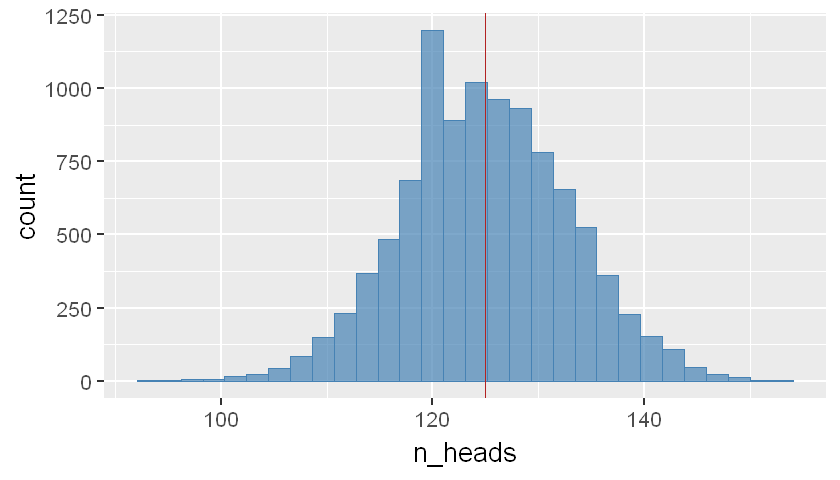

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 4)

p <- ggplot(outcomes_df, aes(x = n_heads)) +
  geom_histogram(color = "steelblue", fill = "steelblue", alpha = 0.7) +
  geom_vline(xintercept = 125, color = "firebrick")

p

In [16]:
test_statistic_simulated = abs(n_heads - expected)

test_statistic_simulated[1:5]

[1] 12  4  1 12 17

In [17]:
sum(test_statistic_simulated >= test_statistic) / length(test_statistic_simulated)

[1] 0.0678

In [18]:
(test_statistic_simulated >= test_statistic) |> mean()

[1] 0.0678

## Bonus

For Python example see "Inference in three hours and more time for the good stuff" by [Allen Downey](https://www.allendowney.com/blog/) at this link:
[https://docs.google.com/presentation/d/1S24Ov2B2TImtiU1UFhPt-BaqS2OgqUZPWnQuS2kKtnA/edit?usp=sharing](https://docs.google.com/presentation/d/1S24Ov2B2TImtiU1UFhPt-BaqS2OgqUZPWnQuS2kKtnA/edit?usp=sharing)